<div style="text-align: center;">
    <h1> <font style="bold"> Agent-Based Model </font></h1>
    <h2><font style="bold"> General Paz </font></h2>
    <h3><font style="bold">Integrantes:</font></h3>
</div>
<div style="display: flex; justify-content: center;">
    <h4><ul>
        <li>Noguera Azul</li>
        <li>Gonzalez Rocio</li>
        <li>Guledjian Patricio</li>
        </ul>
    </h4>
</div>

## Descripción del modelo

### Objetivo

Nuestro objetivo es implementar una simulación realista de la Avenida General Paz. En los tramos de Liniers a Lugones. 

### Entidades / Agentes

Las entidades del modelo, qué serán los qué circulen por él, en nuestro modelo corresponden a los automóviles con sus respectivos conductores. Los agentes son autónomos, es decir, están dotados con comportamientos que les permiten tomar decisiones independientes.

### Atributos

Las entidades tienen distintos atributos que lo describen como:

- Posición **(x)**.
- Velocidad **(v)**.
- Longitud del auto. **(l)**.
- Tiempo de permanencia en la autopista **(t)**.
- Tiempo de reacción de frenado. **(tr)**
- Tiempo en el que el Agente arribó a la Gral. Paz. **(at)**

##### Interacción con otros agentes
Cada agente tiene un vehiculo por detras y por delante. Del vehiculo de adelante dependerá si el agente frena o no. Las reducciones de velocidad son las que causarán los *shockwaves*. 

- Distancia entre vehículo de atras **(ba)**.
- Distancia entre vehiculo de adelante **(fa)**. 

##### Comportamiento
- Los agentes reaccionan (mantienen su velocidad, aceleran y desaceleran) dependiendo de el ambiente y su vecindario. 
- Dependiendo de el comportamiento del agente que maneje el vehiculo, el mismo:
  -  respetará los limites de velocidad o no.
  -   tendrá mas o menos probabilidad de choque.


### Ambiente

El ambiente de nuestro agent-based transportation model será la infraestructura y capacidades de los nodos y enlaces de la red vial. En estas capacidades se crean efectos de congestión (velocidades de viaje reducidas) limitando el número de agentes que se desplazan a través de la red de transporte en un momento dado.

### Variables de Decisión

Las variables de decisión son las qué generarán distintas alternativas o escenarios en el modelo. Es decir, estas serán las qué ayudarán a determinar cuál es el layout óptimo para la solución. 

Nosotros planteamos la **Hipótesis** siguiente:
- *A mayor cantidad de autos autónomos, menor será la probabilidad de choques y menor el tiempo total de los agentes en recorrer la Gral. Paz*

La variable de decisión principal será entonces el porcentaje de autos autónomos en la avenida. 

### Variables de Referencia

Las variables de referencia son las obtenidas cómo resultado de la simulación. Se buscará mejorarlas en función al objetivo.
Tiempo promedio de recorrido de los vehículos.

### Variables de Estado

Las variables de estado son aquellas qué contienen la información necesaria para describir la situación actual de los recursos.
- Tasa de Ocupación en las principales zonas de aglomeración.
- Tasa de ocupación ocasionada por accidentes, vehículos detenidos, obras en la ruta, policías parando, etc.
- Tasa de ocupación ocasionada por mal tiempo.
- Tasa de ocupación del peaje o semáforos  (si es que se agregan).

### Distribuciones

#### Distribución de arribos de vehiculos

Optado por la utilización de una *distribución exponencial* como modelo para representar los arribos de vehículos, y esta elección se fundamenta en diversas consideraciones clave.

La distribución exponencial negativa es una selección frecuentemente empleada en la modelación de procesos de llegada aleatoria. En el contexto de rutas de vehículos, esta distribución se ajusta adecuadamente cuando se asume que los arribos de vehículos son eventos independientes y se producen a una tasa constante a lo largo del tiempo. En otras palabras, la probabilidad de que un vehículo llegue en un periodo determinado es constante y no depende del momento en que llegaron los vehículos previos.

Sin embargo, es fundamental destacar que emplearemos parámetros diferentes para la distribución, dependiendo de la franja horaria en la que nos encontremos, ya sea durante las horas pico o en otros momentos del día.

La distribución que elegiremos para modelar los arribos será la siguiente:
$$f(x | \lambda) = e^{(-\lambda x)}$$

$$
\lambda =
\begin{cases}
\frac{1}{\mu_1} = \frac{1}{15 \text{s}} \, & \text{si es hora pico} \\
\frac{1}{\mu_2} = \frac{1}{45 \text{s}}, & \text{si no es hora pico}
\end{cases}
$$

#### distribución de velocidad de arribos


Para modelar la velocidad de llegada de los agentes a la autopista, se optó por emplear una *distribución normal* con una media de 17 metros por segundo (61.2 kilómetros por hora) y una varianza de 1 metro por segundo (3.6 kilómetros por hora). Esta elección se basa en la búsqueda de un enfoque realista y equilibrado en la simulación.

La elección de una velocidad de llegada no extrema como media tiene como objetivo representar un escenario inicial donde los agentes ingresan gradualmente a la autopista, permitiéndoles adaptarse a las condiciones simuladas de tráfico. Esta aproximación evita situaciones iniciales de alta congestión que podrían resultar en colisiones debido a la falta de adaptación de los agentes.

Por otro lado, la selección de una varianza pequeña contribuye a limitar la dispersión en las velocidades de llegada de los agentes, lo que ayuda a mantener una transición más suave durante el proceso de entrada a la autopista. En resumen, esta elección busca proporcionar una base sólida para la simulación al garantizar que los agentes comiencen con velocidades razonables y converjan gradualmente hacia las condiciones de tráfico simuladas.

En consecuencia, el uso de una distribución normal con estos parámetros se considera adecuado para establecer una entrada controlada y realista de los agentes en la simulación, minimizando la probabilidad de choques provocados por discrepancias iniciales en las velocidades de los vehículos.


$$
f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}
$$

$$
\begin{align*}
\mu & = 17m/s \\
\sigma & = 1m/s
\end{align*}
$$

#### Distribución de velocidad deseada

La distribución triangular es una elección adecuada para simular la velocidad deseada de los agentes en una ruta con un mínimo de 8.34m/s (30 km/h), una moda de 19.45m/s (70 km/h) y un máximo de 27.78m/s (100 km/h) por lo siguiente:

Es una distribución continua que permite modelar situaciones en las que existe un valor mínimo, un valor máximo y un valor modal. En el contexto de la velocidad de los vehiculos en una carretera, es razonable suponer que la mayoría de los vehiculos desearán moverse a una velocidad cercana a la moda (70 km/h) y que habrá algunos que desearan ir más rápido o más lento. 

se optó por emplear esta distribución para que los agentes busquen satisfacer su deseo de acercarse a su velocidad deseada en cada instante de tiempo mientras sea posible. 



$$
f(x) = \begin{cases}
0 & \text{si } x < 30 \\
\frac{2(x-30)}{(70-30)(100-30)} & \text{si } 30 \leq x < 70 \\
\frac{2(70-x)}{(70-30)(70-100)} & \text{si } 100 \leq x \leq 70 \\
0 & \text{si } x > 100
\end{cases}
$$

#### Distribución de variación de velocidad

En nuestra simulación de la Gral. Paz, cada agente se comporta de manera única y puede variar en su velocidad debido a diferentes factores, como la relación con otros agentes y las condiciones del entorno. Para modelar esta variación de velocidad, inicialmente utilizamos la distribución triangular, que nos proporciona una velocidad modal estimada para cada agente.

Sin embargo, sabemos que los agentes no mantendrán una velocidad constante en la carretera, ya que pueden optar por no respetar las leyes de velocidad, frenar de manera abrupta o ajustar su velocidad de acuerdo con la situación. Por lo tanto, para capturar esta variabilidad en la velocidad de manera más realista, decidimos emplear la distribución normal.

La distribución normal se seleccionó como una opción apropiada para modelar la variación de velocidad de los agentes debido a sus ventajas. Esta distribución es ampliamente reconocida por su capacidad para representar la variabilidad en datos del mundo real. Además, su simetría y versatilidad permiten modelar la idea de que algunos agentes pueden conducir a velocidades más altas o más bajas que la velocidad modal, mientras que la mayoría se mantendrá cerca de esta velocidad central.

La distribución normal también se ajusta fácilmente mediante la variación de la varianza, lo que nos permite controlar el grado de variación en las velocidades de los agentes de acuerdo con las necesidades de nuestra simulación.

$$
f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}
$$

$$
\begin{align*}
\mu & \text{ es la velocidad del agente obtenida a partir de la distribución triangular}, \\
\sigma & = 5 \text{ km/h} \text{ (varianza)}.
\end{align*}
$$



entran todos con media 17 y desvio 1, buscan llegar a la velocidad deseada dada por la triangular 
            '''
            la distribución de variacion de velocidad viene dada por una normal con media 
            la diferencia entre la velocidad deseada y la actual multiplicado por 1/3 ponele para que sea realista
            y desvio (gio dijo 1 ) hay que ver que onda

            '''

#### Distribución de frenado

Sabemos que para que un agente logre frenar sin colisionar debe reducir su velocidad  como minimo a la de el agente de adelante. Sin embargo modelar la distribución de frenado de esta forma no se ajusta a la realidad debido a que los mismos son unicos e independientes, por lo que tienen distintos tiempos de reacción, distintas velocidades y distintas velocidades deseadas. 

Por este motivo, decidimos agregarle un factor aleatoreo que se amolde a las propiedades de cada agente.

Elegimos la *distribución exponencial* como medida de error de la reducción necesaria para evitar colisiones. Esto se debe a varias razones fundamentales:

- **Falta de Memoria a Largo Plazo:** Esta propiedad implica que la probabilidad de que un vehículo frene con fuerza en un momento dado no depende de cuánto tiempo haya transcurrido desde el último frenado. 

- **Ajuste de la "Agresividad" del Frenado:** La distribución exponencial nos brinda la flexibilidad de ajustar el grado de "agresividad" en el frenado de los vehículos a través del parámetro de tasa (λ). Al variar el valor de λ, podemos modelar diferentes comportamientos de frenado. Un valor más alto de λ indica que los vehículos son menos propensos a frenar con fuerza cuando están cerca del vehículo de adelante, lo que podría representar situaciones de tráfico más fluidas. Por otro lado, un valor más bajo de λ indica una mayor probabilidad de frenado en distancias cercanas, lo que podría reflejar situaciones de tráfico más congestionadas o conductores más cautelosos.

- **Modelización de Eventos Independientes:** La distribución exponencial es ampliamente utilizada para modelar eventos aleatorios que ocurren de manera independiente a lo largo del tiempo. En el contexto del tráfico, asumimos que los frenados de los vehículos son eventos estocásticos e independientes, ya que las decisiones de frenado de un vehículo no están influenciadas por los eventos de frenado de otros vehículos en el pasado. Esta suposición es coherente con la variabilidad inherente a las interacciones de tráfico en situaciones reales.


##### Es importante comprender como cambia la formula en los diferentes contextos...
- Cuando el agente se encuentra a menos de un segundo del de adelante:
  
    $$\text{reducción} = \frac{\text{velocidad del agente de adelante} - \text{velocidad del agente de atras}}{1 - e^{(\lambda x)} }$$

- Cuando el agente se encuentra entre uno y dos segundo del de adelante:

    $$\text{reducción} = \frac{\text{velocidad del agente de adelante} - \text{velocidad del agente de atras}}{2 - e^{(\lambda x)} }$$


##### Pero, ¿Que significa el $\lambda$?

Este parametro es el tiempo de reacción de el agente. A continuación explicaremos la distribución que utilizamos para el tiempo de reacción.

#### Distribución del tiempo de reacción del agente

Elegimos la *distribución normal* para simular el tiempo de reacción debido a su capacidad para representar la variabilidad realista en los tiempos de reacción de las personas al frenar. La distribución normal se ajusta bien a situaciones en las que la mayoría de los individuos tienen tiempos de reacción cercanos a un valor promedio (la media), con menos personas que experimentan tiempos de reacción significativamente más cortos o más largos. Esto refleja con precisión cómo la mayoría de las personas conducen con tiempos de reacción similares, pero aún existe variabilidad natural. 

Luego de una busqueda de estudios de investigación acerca del comportamiento de los conductores en carreteras, llegamos a la conclusión que el tiempo de reacción promedio de estimulos visuales es de aproximadamente *0.25*. Este puede variar dependiendo la edad, la estatura (los estímulos en las personas altas tienen que recorrer mayor distancia en el sistema nervioso), las enfermedades, el alcohol, las drogas, el cansancio, algunos medicamentos, las condiciones climatológicas, el estrés, etc. Se adjunta a continuación la pagina que tomamos de referencia:

https://sites.google.com/a/iesmonreal.es/kronosferia/3eso/tiempo-de-reaccion

Por otro lado, se decidió por un desvio pequeño ya que las diferencias de los tiempos de reacción entre los agentes es demasiado pequeña en unidad de segundo. 

$$
f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}
$$

$$
\begin{align*}
\mu & = 0.25s \\
\sigma & = 0.005s
\end{align*}
$$


## Simulación

In [108]:
import random 
from typing import Optional
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd

import pygame
import sys

import os

In [109]:
# Define la carpeta donde se encuentran las imágenes de los agentes
agent_images_folder = "vehiculos"

# Lista de nombres de las imágenes que se asignarán a los agentes de manera uniforme
agent_image_names_agent = ["rojo.png", "gris.png", "negro.png"]
agent_image_names_intelligent = ["blue.png"]

In [110]:
class Agent(pygame.sprite.Sprite):

    def __init__(self):
        super().__init__()
        self.position = 0                                                                               
        self.length = 40                                              
        self.front_agent = None                                      
        self.back_agent = None                                       
        self.collision = False                                        
        self.desired_velocity = random.triangular(30/3.6, 100/3.6, 70/3.6)
        self.velocity = random.normalvariate(60/3.6, 1)
        self.time = 0
        self.arrival_time = 0
        self.reaction_time = random.normalvariate(0.15, 0.005) 
        self.image = None

        # Asignar una de las imágenes uniformemente
        image_name = random.choice(agent_image_names_agent)
        self.load_agent_image(image_name)

    def load_agent_image(self, image_name):
        # Construir la ruta completa de la imagen
        image_path = os.path.join(agent_images_folder, image_name)

        # Cargar y ajustar la imagen
        self.image = pygame.image.load(image_path)
        self.image = pygame.transform.scale(self.image, (self.length, 20))

    
    def __str__(self):
        return (
            f"Agent(t={self.time}, at={self.arrival_time}, x={self.position}, "
            f"v={self.velocity}, vd={self.desired_velocity})"
        )

    def dist_to_front_agent(self):
        if self.front_agent == None:
            return None

        else: #hay otro agente adelante
            return  self.front_agent.position - self.position - self.length


    def dist_to_back_agent(self):
        if self.back_agent == None:
            return None

        else: #hay otro agent atras
            return  self.position - self.back_agent.position - self.back_agent.length

    def speed_variation(self):
        # voy a querer acelerar/desacelerar dependiendo de mi velocidad deseada siempre y cuando tenga lugar para hacerlo
        if self.dist_to_front_agent() is not None:

            # quiero acelerar
            if self.velocity < self.desired_velocity:

                if self.dist_to_front_agent() / (self.velocity) >= 4:
                    acceleration = random.normalvariate((self.desired_velocity - self.velocity) * 1/2, 1)

                    if acceleration > 4:
                        acceleration == 4
                    self.velocity += acceleration
            
            # quiero desacelerar
            if self.velocity > self.desired_velocity:
                if self.dist_to_front_agent() / (self.velocity) >= 2:
                    self.velocity += random.normalvariate((self.desired_velocity - self.velocity) * 1/3, 1)


        # si no tengo agente adelante, variara mi velocidad hasta mi la deseada
        if self.dist_to_front_agent() is None:
            self.velocity += random.normalvariate((self.desired_velocity - self.velocity) * 1/3, 1)

        
    def reduce_speed(self):
        # si se encuentra "cerca" del agente de adelante, reducirá su velocidad mediante una distribución exponencial con media 1.
        if self.dist_to_front_agent() is not None and self.dist_to_front_agent() / (self.velocity - self.front_agent.velocity) < 1:   
                    if self.front_agent.velocity < self.velocity:
                        reduction = (self.front_agent.velocity - self.velocity - 5) /(1 - stats.expon.rvs(scale=self.reaction_time))

                        # verificamos que sea una reducción posible para un agente humano. 
                        if reduction < -4:
                            #Imposible que frene un humano
                            self.collision = True
                            
                        else:
                            self.velocity += reduction

        if self.dist_to_front_agent() is not None and self.dist_to_front_agent() / (self.velocity - self.front_agent.velocity) < 2 and self.dist_to_front_agent() / (self.velocity - self.front_agent.velocity) >= 1:   
            if self.front_agent.velocity < self.velocity:
                reduction = (self.front_agent.velocity - self.velocity) /(1 - stats.expon.rvs(scale=self.reaction_time))

                self.velocity += reduction
    
        if self.velocity < 1:
            self.velocity = 1   
            
    def move(self):
        self.position = self.position + self.velocity * 1 
    
    def get_position(self):
        return self.position

    def update(self):
        self.move()
        self.reduce_speed()
        self.speed_variation()

        self.time += 1

In [111]:
class IntelligentCar(pygame.sprite.Sprite):

    def __init__(self):
        super().__init__()
        self.position = 0
        self.length = 40
        self.front_agent = None
        self.back_agent = None
        self.collision = False
        self.desired_velocity = 80/3.6
        self.velocity = random.normalvariate(60/3.6, 1)
        self.time = 0
        self.arrival_time = 0
        self.image = None

        # Asignar una de las imágenes uniformemente
        image_name = random.choice(agent_image_names_intelligent)
        self.load_agent_image(image_name)

    def load_agent_image(self, image_name):
        # Construir la ruta completa de la imagen
        image_path = os.path.join(agent_images_folder, image_name)

        # Cargar y ajustar la imagen
        self.image = pygame.image.load(image_path)
        self.image = pygame.transform.scale(self.image, (self.length, 20))

    def __str__(self):
        return (
            f"IntelligentCar(t={self.time}, at={self.arrival_time}, x={self.position}, "
            f"v={self.velocity}, vd={self.desired_velocity})"
        )

    def dist_to_front_agent(self):
        if self.front_agent is None:
            return None
        else:
            return abs(self.position - self.front_agent.position + self.length)

    def dist_to_back_agent(self):
        if self.back_agent is None:
            return None
        else:
            return abs(self.back_agent.position - self.position + self.back_agent.length)

    def adjust_speed(self):
        # Calcula la velocidad deseada en función de la distancia con el automóvil de adelante y atrás
        safe_distance = 10  # Distancia segura deseada entre vehículos en metros
        min_following_distance = 5  # Distancia mínima de seguimiento en metros

        # Calcular la velocidad deseada en función de la distancia con el automóvil de adelante
        if self.dist_to_front_agent() is not None:
            desired_velocity_front = min(self.desired_velocity,(self.dist_to_front_agent() - safe_distance))
        else:
            desired_velocity_front = self.desired_velocity

        # Calcular la velocidad deseada en función de la distancia con el automóvil de atrás
        if self.dist_to_back_agent() is not None:
            desired_velocity_back = min(self.desired_velocity, (self.dist_to_back_agent() - min_following_distance))
        else:
            desired_velocity_back = self.desired_velocity

        # Ajustar la velocidad deseada en función de ambas distancias
        if desired_velocity_front < desired_velocity_back:
            self.velocity = max(desired_velocity_front, 0)
        else:
            self.velocity = max(desired_velocity_back, 0)

    def move(self):
        self.position += self.velocity * 1

    def get_position(self):
        return self.position

    def update(self):
        self.move()
        self.adjust_speed()
        self.time += 1

In [112]:
class Road:
    
    def __init__(self, m:int, c:bool):
        self.km = m
        self.agents = []
        self.time = 0
        self.total_time = 2000
        self.congestion = c
        self.collision_count = 0
        self.trip_time = []
        self.agent_velocities = {}

    def add_agent(self):
        
        # Seleccionamos el tipo de agente a agregar, con una probabilidad de 0.1 de que sea un IntelligentCar y 0.9 de que sea un Agent
        agent_type = random.choices([IntelligentCar, Agent], weights=[0.25, 0.75])[0]
        new_agent = agent_type()
        
        if not self.agents:
            self.agents.append(new_agent)
            # print("Primer agente agregado: " + str(self.agents[0]))
            if self.congestion == True:
                # Agrega autos con distribución exponencial negativa con media = 1
                self.time_to_next_arrival = stats.expon.rvs(scale=3)
            else: 
                # Agrega autos con distribución exponencial negativa con media = 10
                self.time_to_next_arrival = stats.expon.rvs(scale=10)

        else:
            # Verificamos el tiempo desde el último agente
            if self.time - self.agents[-1].arrival_time > self.time_to_next_arrival and self.agents[-1].position > 80:
                # Agregamos un nuevo agente a la lista
                self.agents.append(new_agent)
                
                new_agent.arrival_time = self.time

                if self.congestion == True:
                    # Agrega autos con distribución exponencial negativa con media = 1
                    self.time_to_next_arrival = stats.expon.rvs(scale=3)
                    
                else: 
                    # Agrega autos con distribución exponencial negativa con media = 10
                    self.time_to_next_arrival = stats.expon.rvs(scale=10)

                # Configuramos el front y back car para el nuevo agente
                if len(self.agents) >= 2:
                    position_new_agent = self.agents.index(new_agent)
                    new_agent.front_agent = self.agents[position_new_agent - 1]
                    self.agents[position_new_agent - 1].back_agent = new_agent
                    
        # Agregamos la velocidad del agente a la lista de velocidades
        self.agent_velocities[new_agent.arrival_time] = []

        self.update_road()
    
    def update_road(self):
        self.time += 1
        # print("Tiempo:", self.time)
        removed = set()
        for agent in self.agents:
            agent.update()
            # print("Agente:", self.agents.index(agent), "->", agent)
            self.agent_velocities[agent.arrival_time].append(agent.velocity)
            print("Velocidad del agente:", self.agent_velocities[agent.arrival_time], 'velocidades:', len(self.agent_velocities[agent.arrival_time]))
            #Si el agente llega al final de la carretera lo eliminamos
            if agent.position > self.km:
                self.trip_time.append(agent.time)
                removed.add(agent)

            #Reasignamos el front y back car de los agentes extremos de la lista
            if len(self.agents) > 0:
                self.agents[0].front_agent = None

            if agent.collision == True:
                removed.add(agent)
                removed.add(agent.front_agent)
                self.collision_count += 1

        # reasingo la posiciones de la lista
        for agent in removed:
            # Si hay choque lo eliminamos y reasignamos los front y back car
            self.agents.remove(agent)
        
        for agent in self.agents:
            if self.agents.index(agent) != 0:
                        agent.front_agent = self.agents[self.agents.index(agent) - 1]
            else:
                agent.front_agent = None
                
            if self.agents.index(agent) != (len(self.agents) - 1):
                agent.back_agent = self.agents[self.agents.index(agent) + 1]
            else:
                agent.back_agent = None


In [113]:
import pygame
import sys

# Inicializar Pygame
pygame.init()

# Configuración de la ventana
width, height = 1000, 100
screen = pygame.display.set_mode((width, height))
pygame.display.set_caption("Avenida General Paz")

# Colores
white = (255, 255, 255)
gray = (200, 200, 200)
green = (0, 150, 0)
black = (0, 0, 0)
red = (255, 0, 0)

# Registro del tiempo de inicio
start_time = pygame.time.get_ticks()

# Lista para almacenar los tiempos de viaje
trip_time_list = []

# Crear una carretera (supongo que la variable 'road' es previamente definida)
general_paz = Road(m=17000, c=True)

delay = 50  # Milisegundos de retraso entre fotogramas (ajusta según sea necesario)

# Pausa inicial antes de agregar agentes
initial_pause_time = 2000  # Tiempo en milisegundos (1 segundo)
pygame.time.delay(initial_pause_time)

# Bucle principal
running = True
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

    if general_paz.time < general_paz.total_time:
        # Actualizar la carretera y los agentes en cada iteración
        general_paz.add_agent() 
        
        # Agregar el tiempo de viaje de los agentes que llegan al final de la autopista a la lista
        trip_time_list.extend(general_paz.trip_time)
        general_paz.trip_time = []  # Limpiar la lista de tiempos para la próxima iteración

        # Crear un nuevo DataFrame con los tiempos de viaje en esta iteración
        trip_time_df = pd.DataFrame({'Time': trip_time_list})

        # Guardar el DataFrame en un archivo CSV (puedes cambiar el nombre del archivo según tus necesidades)
        trip_time_df.to_csv('./data/trip_times.csv', index=False)


    # Dibujar el pasto verde arriba de la carretera
    pygame.draw.rect(screen, green, (0, 0, width, height // 3))

    # Carretera gris
    pygame.draw.rect(screen, gray, (0, height // 3, width, height // 3))

    # Dibujar el pasto verde abajo de la carretera
    pygame.draw.rect(screen, green, (0, 2 * height // 3, width, height // 3))

    # Líneas blancas en el medio de la carretera
    line_width = 10
    line_height = 5
    num_lines = 30
    gap = width // (num_lines + 1)
    for i in range(num_lines):
        x = (i + 1) * gap - line_width // 2
        pygame.draw.rect(screen, white, (x, height // 2 - line_height // 2, line_width, line_height))

    # Dibujar los agentes en la carretera
    for agent in general_paz.agents:
        # Si el agente tiene una imagen, dibújala en lugar de un rectángulo
        screen.blit(agent.image, (agent.get_position(), height // 2.5))

    # Calcular el tiempo transcurrido en segundos
    current_time = pygame.time.get_ticks()
    elapsed_time_seconds = (current_time - start_time) / 1000  # Convierte a segundos

    # Mostrar el tiempo transcurrido en la ventana
    # display_elapsed_time(screen, elapsed_time_seconds)

    pygame.display.flip()

    # Agregar un retraso para ralentizar la simulación
    pygame.time.delay(delay)

# Salir del juego
pygame.quit()
sys.exit()

In [ ]:
import statistics

def run_simulation_multiple_times(num_simulations):
    total_time_on_road = []
    total_collisions = []

    for _ in range(num_simulations):
        # Crear una nueva carretera para cada simulación
        general_paz = Road(1000, True)  # Ajusta los parámetros según tus necesidades

        # Ejecutar la simulación
        general_paz.add_agent()  # Agrega al menos un agente inicialmente

        while general_paz.time < general_paz.total_time:
            general_paz.add_agent()

        # Recopilar datos de la simulación actual
        total_time_on_road.append(general_paz.time)
        total_collisions.append(general_paz.collision_count)

    # Calcular el tiempo promedio en la carretera y la cantidad total de choques
    average_time_on_road = statistics.mean(total_time_on_road)
    total_collisions = statistics.mean(total_collisions)

    return average_time_on_road, total_collisions

# Ejemplo de cómo llamar a la función
num_simulations = 1  # Número de simulaciones que deseas ejecutar
avg_time, total_collisions = run_simulation_multiple_times(num_simulations)

print(f"Tiempo promedio en la carretera en {num_simulations} simulaciones: {avg_time}")
print(f"Promedio de choques en {num_simulations} simulaciones: {round(total_collisions)}")


KeyboardInterrupt: 

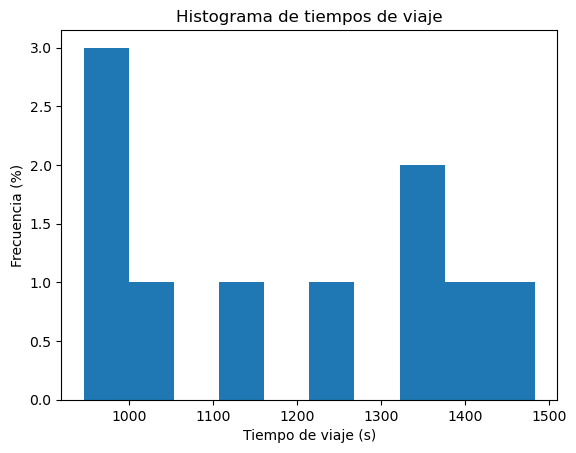

In [ ]:
trip_times = pd.read_csv('./data/trip_times.csv')

plt.hist(trip_times['Time'], bins=10)
plt.xlabel('Tiempo de viaje (s)')
plt.ylabel('Frecuencia (%)')
plt.title('Histograma de tiempos de viaje')

plt.show()